I intend to evaluate the hypothesis that having foreign-born players on a team leads to better FIFA rankings in men’s football. I found two data sources: the first is a list of FIFA rankings from 1992-2019, the second is a list of foreign-born players who have played in FIFA world cups from 1930 until 2018.

Summary of wrangling steps performed in DataWrangling notebook:
1. Loaded the first csv file containing FIFA rankings as df1.

2. Eventually decided to focus on 3 df1 columns for the final statistical analysis: ‘rank’, ‘rank-date’ renamed to 
   'date' and ‘country-full’ renamed to 'country'.
   
3. Loaded the second file containing foreign-born players in FIFA world cup tournaments as df2.

4. I decided to focus on four df2 columns for statistical analysis: “NameFootballPlayer”, “'International” 
   (renamed to "country"), “FIFAWorldCup”(which contains the year the player participated in the tournament 
   therefore renamed to “date”). 
   
5. Performed an inner merge on df1 and df2 on the “country” column in each respective DataFrame. I then 
   dropped the extra date column from df2.
   
6. In an effort to minimize the number of rows in the merged dataframe(at this point numbering at about 2 
    million) I sliced the rows to only focus on dates from January 1994 onwards.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [43]:
#Loading dataframe saved from data wrangling process
new_df = pd.read_csv('wrangled-dataframe', parse_dates = ['date_y'])

In [44]:
cols = ['rank', 'country', 'NameFootballPlayer', 'Foreign-born', 'date_y']
new_df = new_df[cols]
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302239 entries, 0 to 1302238
Data columns (total 5 columns):
rank                  1302239 non-null int64
country               1302239 non-null object
NameFootballPlayer    1302239 non-null object
Foreign-born          1302239 non-null int64
date_y                1302239 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 49.7+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1af1a050>,
      dtype=object)

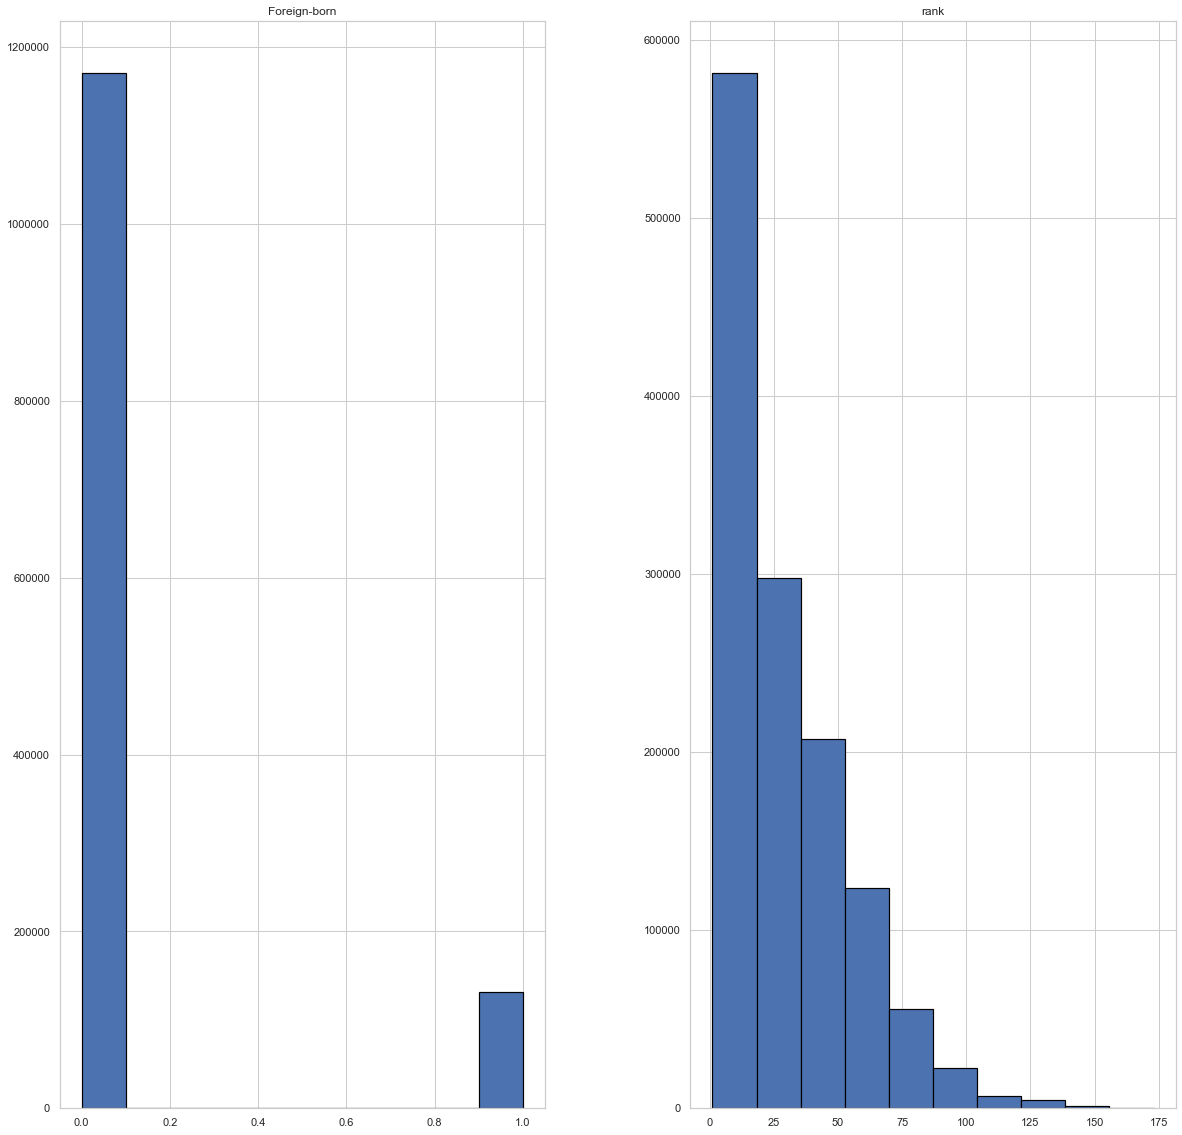

In [45]:
new_df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

In [36]:
sort_df = new_df.groupby('country')[['rank', 'Foreign-born']].agg({'rank': 'mean', 'Foreign-born': 'sum'}).sort_values(by = 'rank')
sort_df.head(10)

,rank,Foreign-born
country,,
Brazil,3.166113,0
Germany,5.488372,10234
Spain,5.491694,2408
Argentina,5.697674,903
France,8.664452,6622
Italy,8.717608,1806
Netherlands,9.166113,3010
England,10.362126,1505
Portugal,11.172757,6321


In [37]:
sort_df.tail(10)

,rank,Foreign-born
country,,
Slovenia,55.598007,903
Bosnia and Herzegovina,57.830882,1632
Jamaica,60.119601,2408
Iceland,64.514950,602
Trinidad and Tobago,67.202658,903
Bolivia,72.059801,1204
Angola,84.129568,0
Togo,87.073090,1806
Panama,88.568106,0


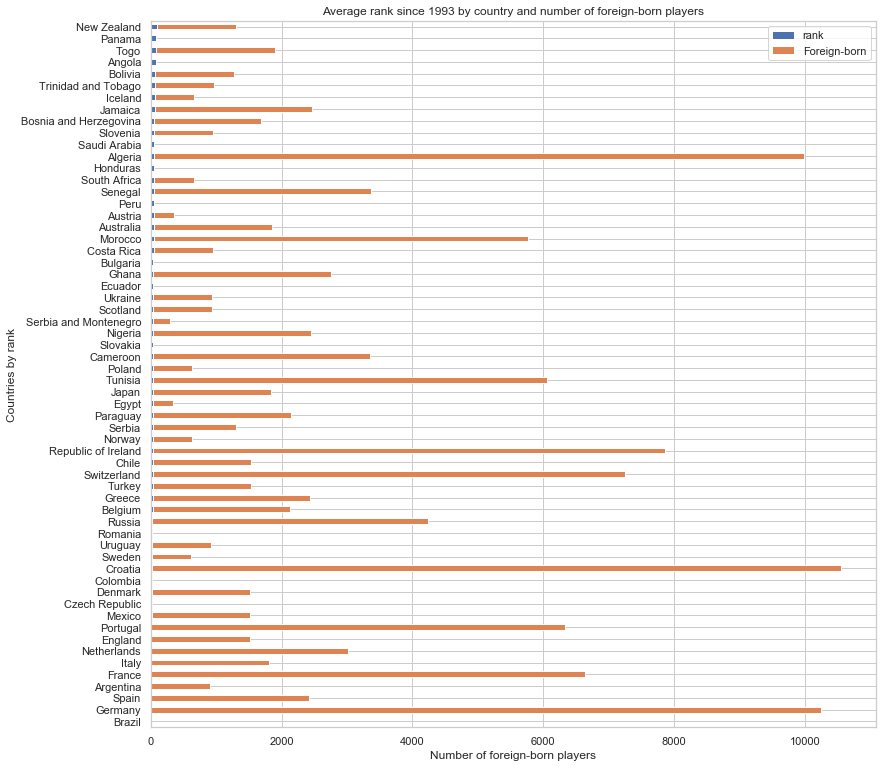

In [38]:
_ = sort_df.plot.barh(figsize = (13, 13), stacked = True)
_ = plt.xlabel('Number of foreign-born players')
_ = plt.ylabel('Countries by rank')
_ = plt.title('Average rank since 1993 by country and number of foreign-born players')

The bar graph above shows no clear correlation between a country's rank and it's proportion of foreign-born players. For example, Brazil which has the highest average rank since 1993 has had no foreign-born players while Panama which also has had no foreign-born players has one of the lowest rankings. Germany, which has the second highest average rank has had foreign-born players while Algeria, which has one of the highest proportions of foreign-born players is ranked in the bottom half.

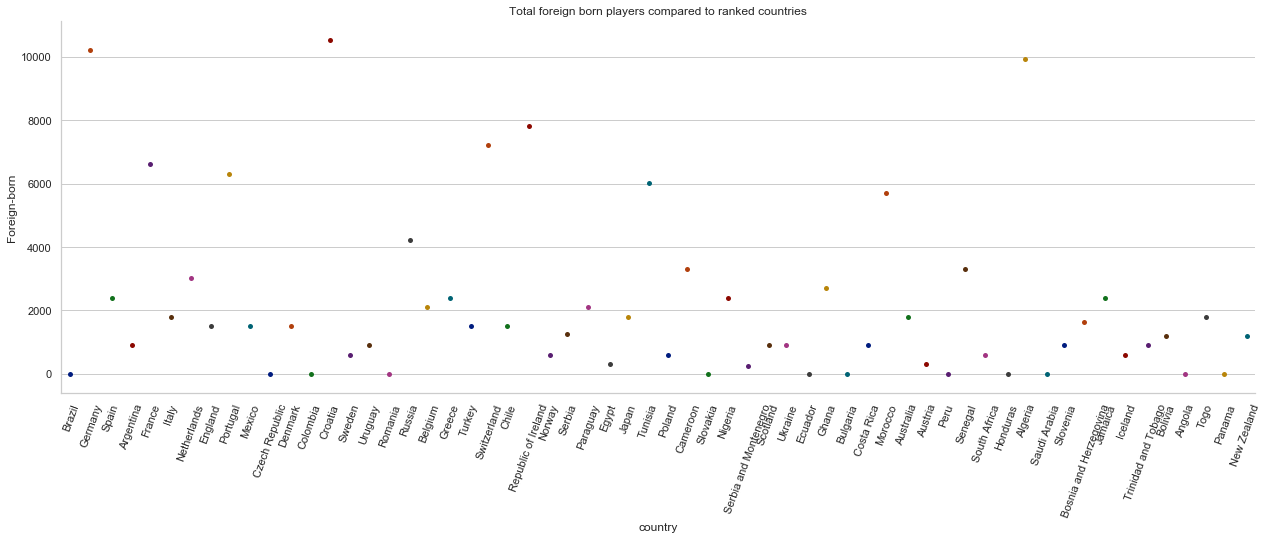

In [39]:
sns.set(style = 'whitegrid')
_= sns.catplot(data = sort_df.reset_index(), x = 'country', y = 'Foreign-born', palette = 'dark', 
               height = 6, aspect = 3)
_.set_xticklabels(rotation=70)
_ = plt.title("Total foreign born players compared to ranked countries")

Aggregating the 'Foreign-born' column above produces some atypical values for the sum of foreign born players. It indicates that Germany and Croatia for example have each had a total of over 10,000 players foreign-born players between 1993 and 2018. Merging on the original dataframes which had duplicate rows resulted in a dataframe that had an inflated number of rows. Dropping duplicates from the original dataframes only resulted in a modest decrease in the final dataframe's number of rows. I decided to aggregate the 'Foreign-born' column with the mean function instead of the sum function. 

In [40]:
sort_df1 = new_df.groupby('country')[['rank', 'Foreign-born']].agg({'rank': 'mean', 'Foreign-born': 'mean'}).sort_values(by = 'rank')

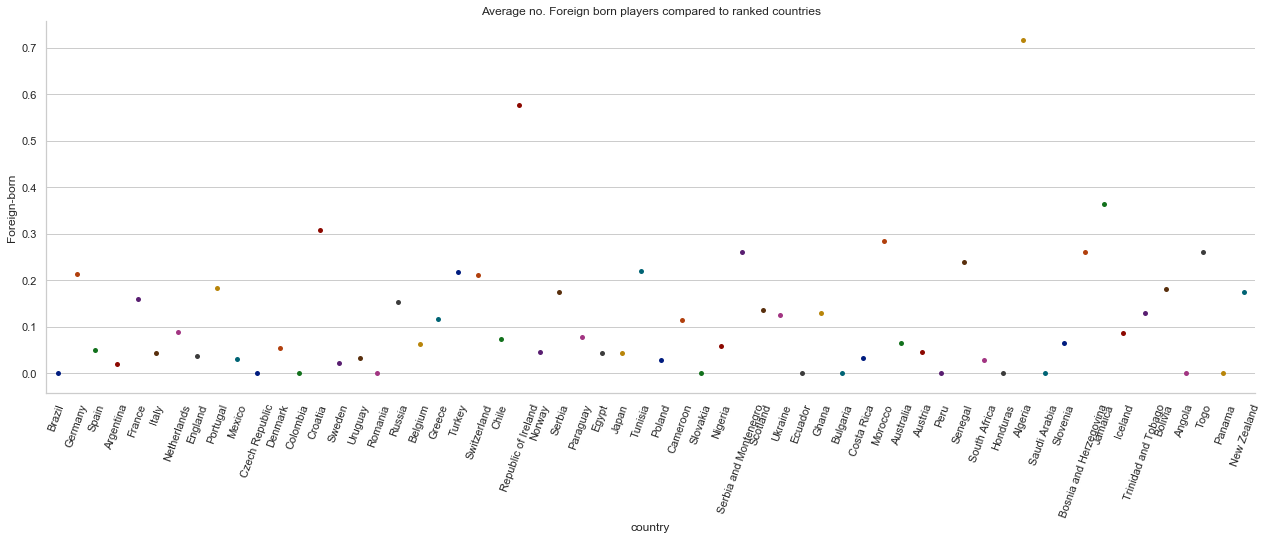

In [41]:
sns.set(style = 'whitegrid')
_= sns.catplot(data = sort_df1.reset_index(), x = 'country', y = 'Foreign-born', palette = 'dark', 
               height = 6, aspect = 3)
_.set_xticklabels(rotation=70)
_ = plt.title("Average no. Foreign born players compared to ranked countries")

The majority of countries have had at least 1 foreign-born player on their team. Even after aggregating the 'Foreign-born' column with the mean function, there is still no clear distinction between the rank of countries that have no foreign-born players and countries that have at least one foreign-born player. 

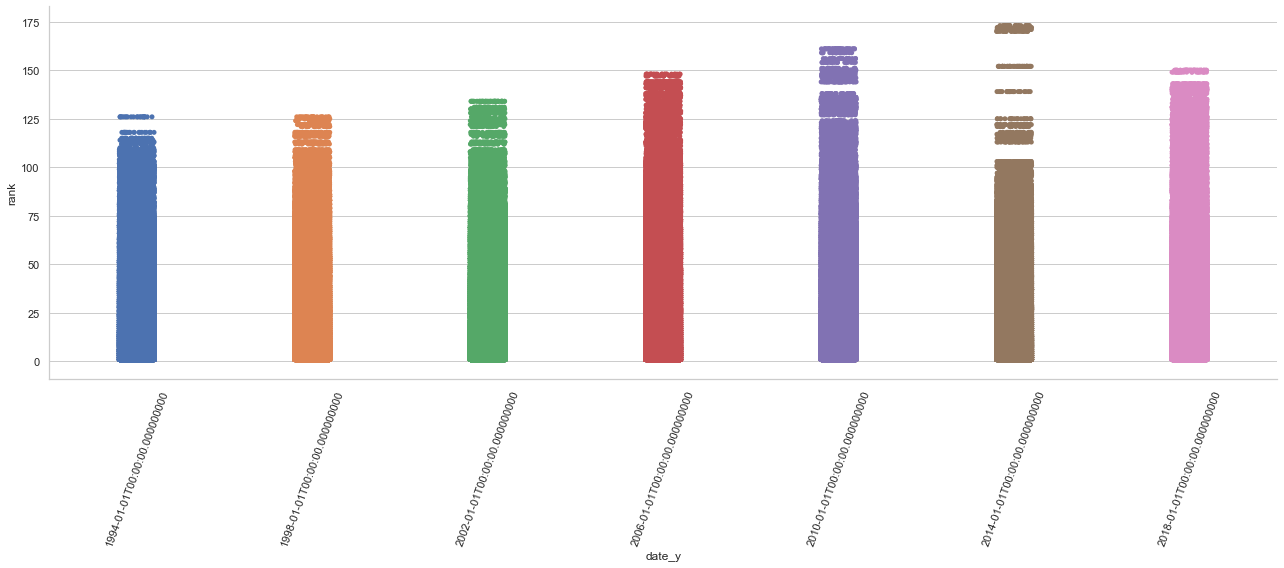

In [56]:
sns.set(style = 'whitegrid')
_ = sns.catplot(x = 'date_y', y = 'rank', data = new_df, height = 6, aspect = 3)
_.set_xticklabels(rotation=70)


The image above shows the FIFA world cup tournament held in 2014 had the greatest range of participating countries in terms of rank while 1994 and 1998 had the least.

# Hypothesis:
1. Null hypothesis: there is no difference in ranking between countries that have more foreign-born players vs countries that have fewer foreign-born players
2. Alternate hypothesis: countries which have more foreign-born players have better FIFA rankings

# Exploring Relationships in the Data: 
1. Chi-Squared Test useful to determine which categorical inputs affect our output variable.
2. Assumptions: variables are categorical (ordinal/ nominal) and variables are independent assuming the Null


The test compares observed frequencies to expected frequencies and from there determines whether an input is independent of the output variable or not. This is determined by comparing the chi-square values (small chi-square values indicate relatively small dependence, large chi-square values indicate a gulf between observed and expected frequencies and therefore we can be sure that values are dependent). From there, any independent inputs can be discarded from our analysis.

In [57]:
# chi squared test exploring the relationship between 'rank' and 'foreign_born' columns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

chi2, p, dof, expected = chi2_contingency(new_df[['rank', 'Foreign-born']])
print("The chi-squared value between ranking and number of foreign born players is: ", chi2)
print("The p value is: ", p)

The chi-squared value between ranking and number of foreign born players is:  2632748.777515983
The p value is:  0.0


-> The chi-squared value is very high: 2,632,748 (the observed frequency is very high as opposed to the expected frequency under the null hypothesis) and the p-value is 0. This result can be interpreted thus:

The large chi-squared value is unusual but the data set is also very large with about 1,300,000 rows. 

If there was no difference in rankings between countries that had more foreign born players and countries that had fewer foreign born players, this very large difference between the expected frequencies and the observed frequencies can only be observed 0% of the time.

We can then reject the null hypothesis that there is no difference in ranking for countries that have more foreign-born players vs countries that don't.